## Desafio EDA - Rocketseat

In [1]:
import pandas as pd

In [2]:
df_netflix = pd.read_csv("./datasets/netflixdailytop10.csv")

In [3]:
df_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


### Tipos de dados disponíveis

In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [5]:
# Transformar As of (data) de object para datetime

df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

In [6]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


### Período da análise feita

In [7]:
start_date = df_netflix['As of'].min()
end_date = df_netflix['As of'].max()

start_date, end_date

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

Análise feita com data inicial em 01/04/2020 e data final em 11/03/2022

### Tamanho da base de dados

In [8]:
df_netflix.size, df_netflix.shape

(71000, (7100, 10))

A Base de dados possui no total, 71000 informações.
Estão divididas entre 10 colunas e 7100 linhas

### Verificar dados nulos

In [9]:
df_netflix.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [10]:
df_netflix['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

Temos dados nulos apenas na coluna "Netflix Exclusive", sendo que os unicos dados dessa coluna são 'Yes' e 'nan'.
Podemos presumir que, os dados nulos nessa coluna são de títulos que não são exclusivos Netflix, dessa forma, podemos substituir os dados nulos por 'No'

In [11]:
df_netflix['Netflix Exclusive'].fillna('No', inplace=True)

C:\Users\vitor\AppData\Local\Temp\ipykernel_24360\2131898941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['Netflix Exclusive'].fillna('No', inplace=True)


### Outliers

<Axes: >

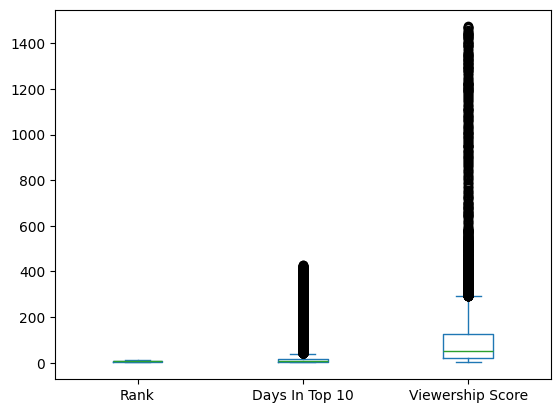

In [12]:
df_netflix.plot.box()

<Axes: ylabel='Frequency'>

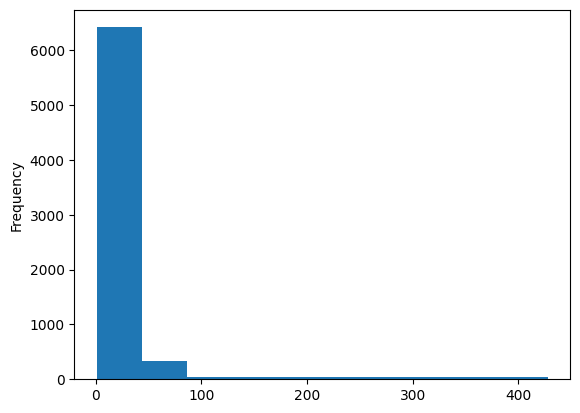

In [13]:
df_netflix['Days In Top 10'].plot.hist()

In [36]:
# Método Tukey
q1 = df_netflix['Days In Top 10'].quantile(0.25)
q3 = df_netflix['Days In Top 10'].quantile(0.75)
iqr = q3 - q1
iqr

15.0

In [37]:
# Limites
lim_inf = q1 - (iqr * 1.5)
lim_sup = q3 + (iqr *1.5)
lim_inf, lim_sup

(-19.5, 40.5)

In [27]:
df_outlier_top10 = df_netflix[(df_netflix['Days In Top 10'] < lim_inf) | (df_netflix['Days In Top 10'] > lim_sup)]

In [31]:
df_outlier_top10['Title'].unique()

array(['Ozark', 'Outer Banks', 'Cocomelon', 'The Queenâ\x80\x99s Gambit',
       'Cobra Kai', 'Bridgerton', 'iCarly', 'Ginny & Georgia',
       'Who Killed Sara?', 'Lucifer', 'Manifest', 'Virgin River',
       'All American', 'Shameless', 'Squid Game', 'Maid', 'Tiger King',
       'The Queen of Flow', 'Emily in Paris', 'The Witcher',
       'Too Hot to Handle', 'Sweet Magnolias', 'Love is Blind'],
      dtype=object)

In [33]:
df_outlier_top10[df_outlier_top10['Days In Top 10'] == df_outlier_top10['Days In Top 10'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474


<Axes: ylabel='Frequency'>

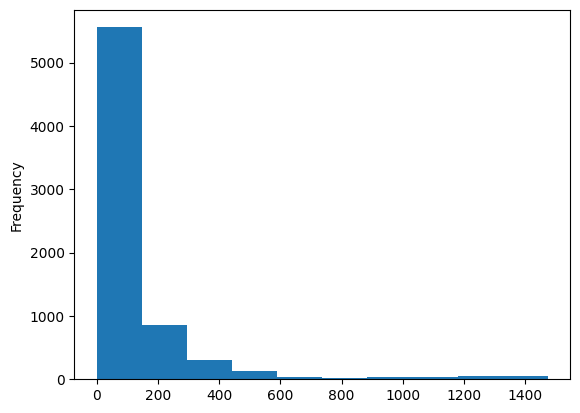

In [19]:
df_netflix['Viewership Score'].plot.hist()

In [39]:
# Método Tukey
q1vs = df_netflix['Viewership Score'].quantile(0.25)
q3vs = df_netflix['Viewership Score'].quantile(0.75)
iqrvs = q3vs - q1vs
iqrvs

109.0

In [40]:
# Limites
lim_inf_vs = q1vs - (iqrvs * 1.5)
lim_sup_vs = q3vs + (iqrvs *1.5)
lim_inf_vs, lim_sup_vs

(-144.5, 291.5)

In [41]:
df_outlier_viewership = df_netflix[(df_netflix['Viewership Score'] < lim_inf_vs) | (df_netflix['Viewership Score'] > lim_sup_vs)]
df_outlier_viewership

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
236,2020-04-24,7,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",32,292
247,2020-04-25,8,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",33,295
255,2020-04-26,6,8,3,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",34,300
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",35,301
2382,2020-11-25,3,2,3,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",33,296
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6,3,Sweet Magnolias,TV Show,Yes,"May 19, 2020",45,344
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [42]:
df_outlier_viewership['Title'].unique()

array(['Tiger King: Murder, Mayhem …', 'The Queenâ\x80\x99s Gambit',
       'Cobra Kai', 'Cocomelon', 'Bridgerton', 'Ginny & Georgia',
       'Lucifer', 'Manifest', 'Virgin River', 'Outer Banks',
       'All American', 'Squid Game', 'Maid', 'Tiger King', 'Ozark',
       'Too Hot to Handle', 'Sweet Magnolias', 'Love is Blind'],
      dtype=object)

In [43]:
df_outlier_viewership[df_outlier_viewership['Viewership Score'] == df_outlier_viewership['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474
